# Import Required libraries

In [47]:
import os
import random
import matplotlib.pyplot as plt
import cv2


# Load and Preprocess the Dataset

In [48]:
dataset_dir = 'C:\\Users\\LENOVO\\Downloads\\art dataset\\dataset_updated\\training_set\\drawings' 
image_files = os.listdir(dataset_dir)
random.shuffle(image_files)  # Shuffle the order of images

# Load and preprocess the images
images = []
for file in image_files:
    if file.endswith('.jpg'):
        image_path = os.path.join(dataset_dir, file)
        image = cv2.imread(image_path)
        # Preprocess the image (resize, normalize, etc.) as needed
        # Add the preprocessed image to the list
        images.append(image)


# Displaying Images

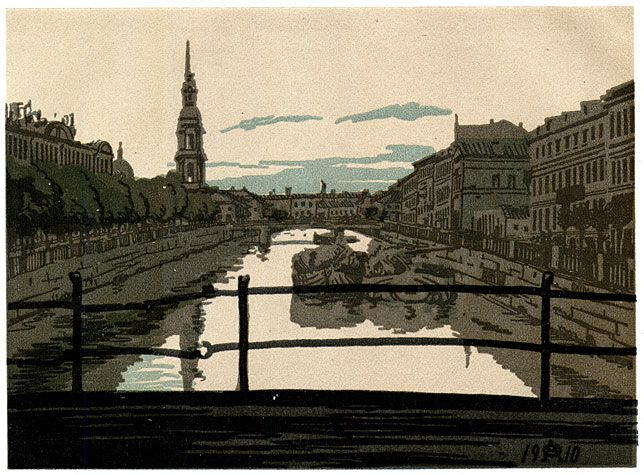

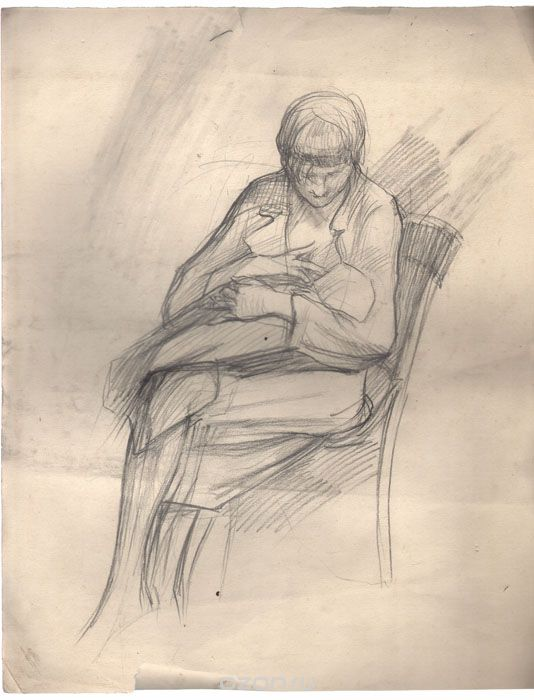

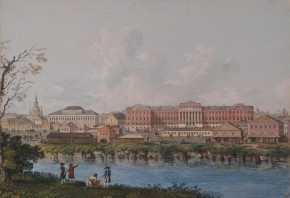

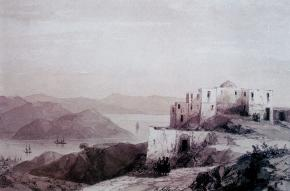

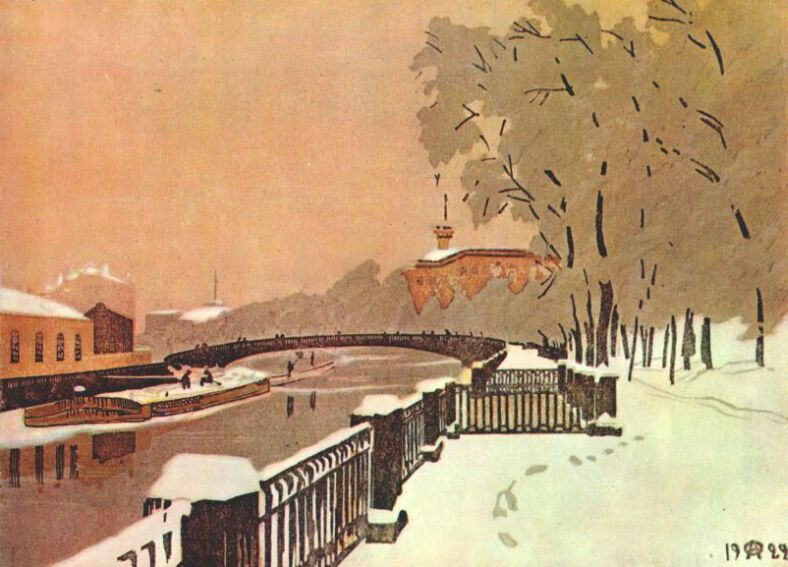

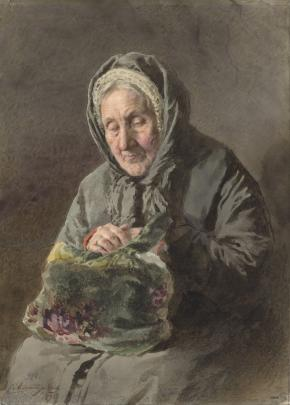

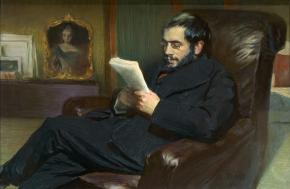

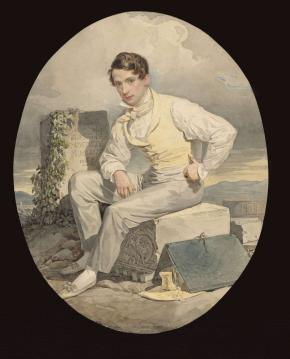

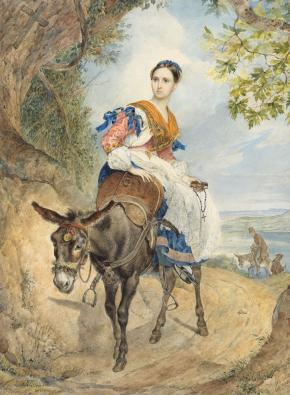

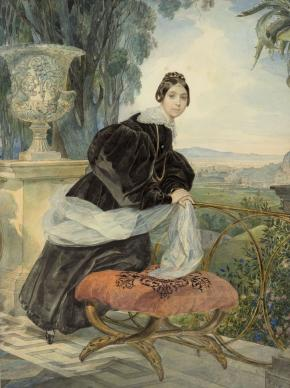

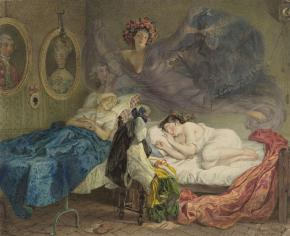

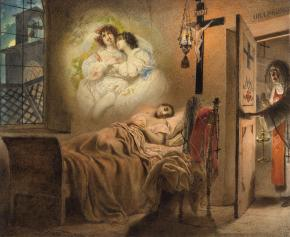

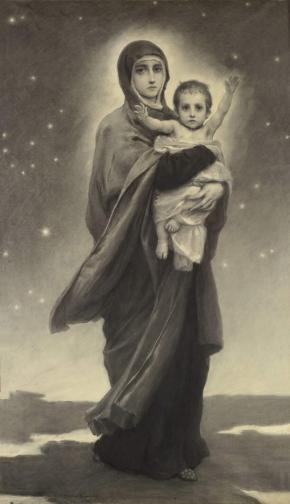

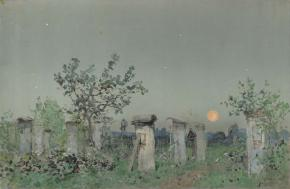

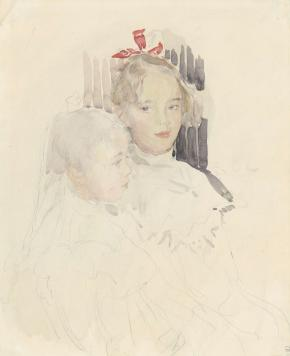

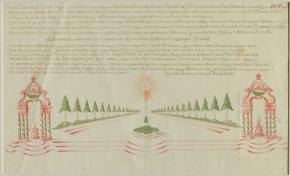

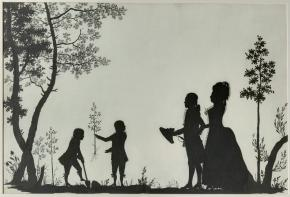

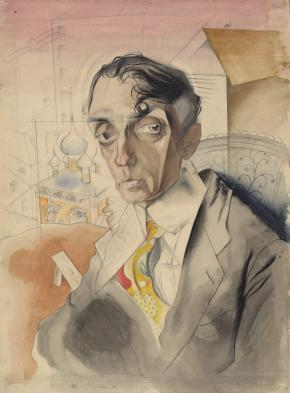

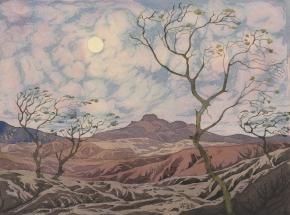

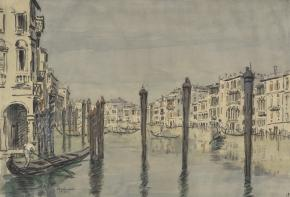

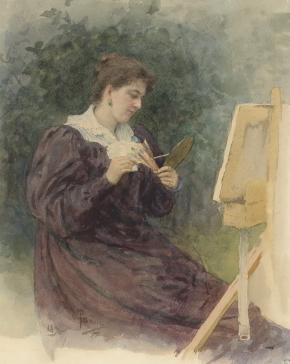

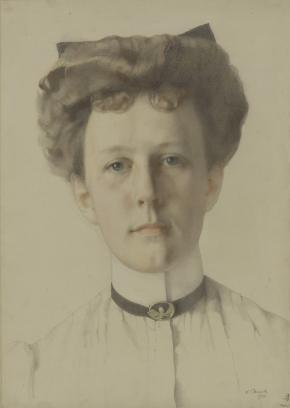

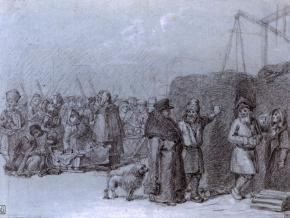

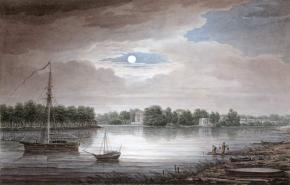

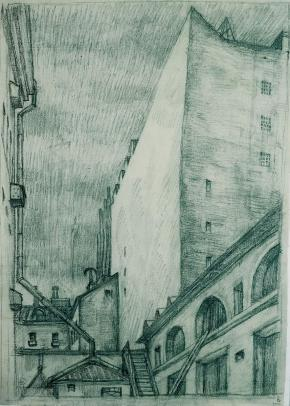

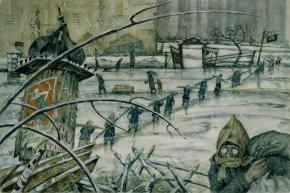

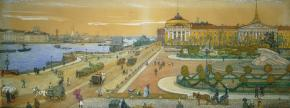

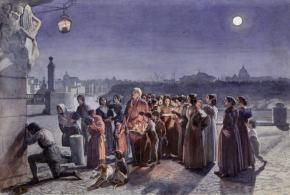

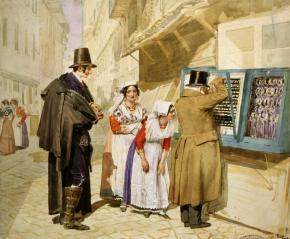

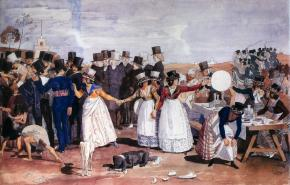

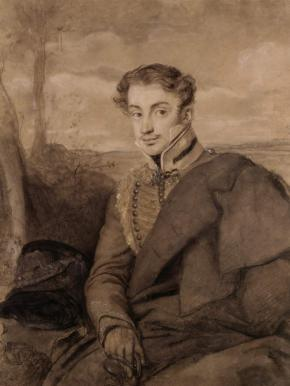

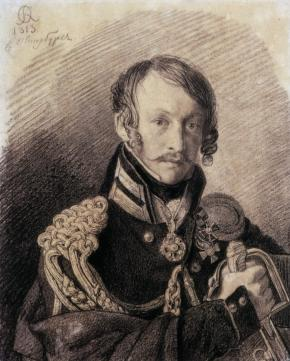

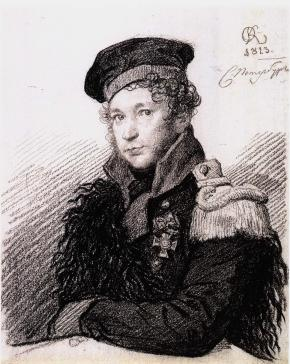

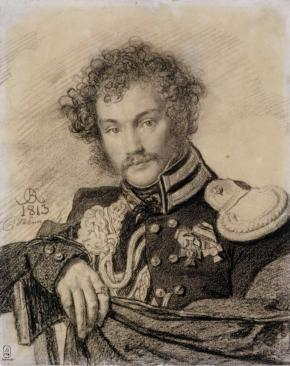

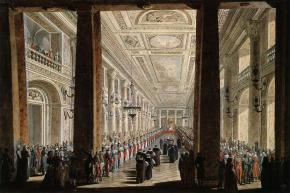

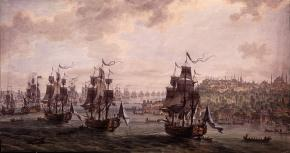

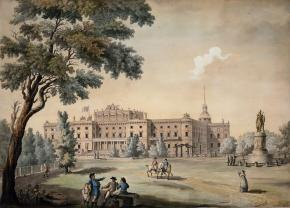

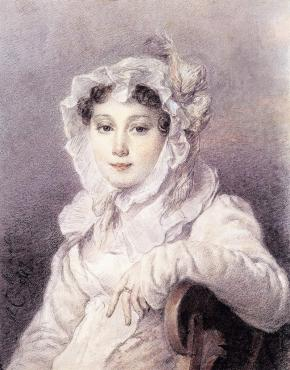

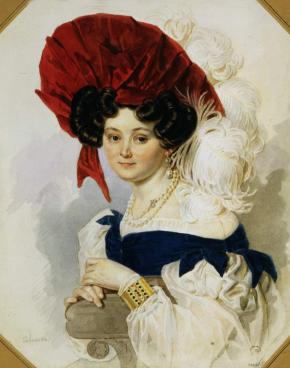

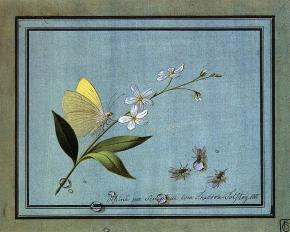

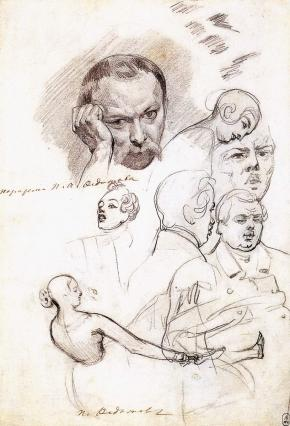

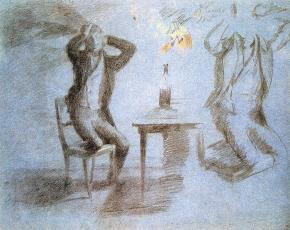

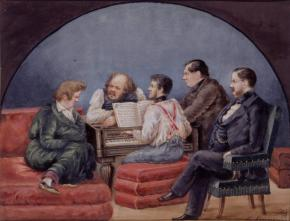

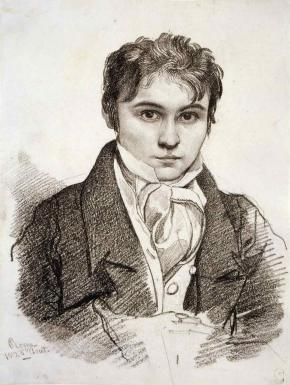

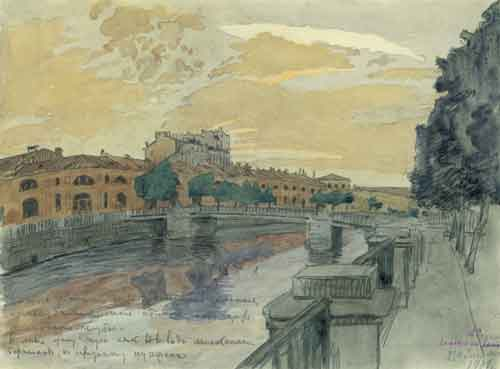

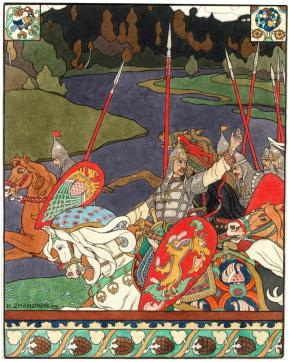

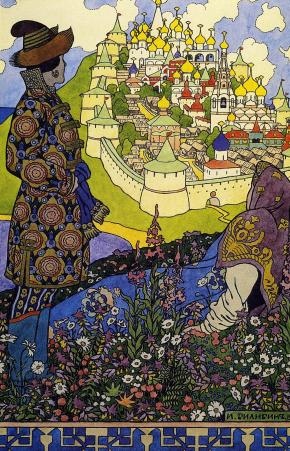

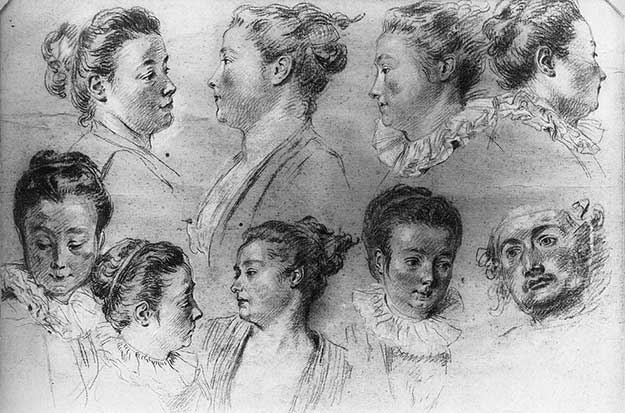

In [16]:
from IPython.display import Image, display
import os

# Use the existing dataset_dir variable
image_dir = dataset_dir  # Use the path you specified earlier

# List all files in the directory
image_files = os.listdir(image_dir)

# Loop through the image files and display them
for image_file in image_files:
    if image_file.endswith('.jpg') or image_file.endswith('.png'):
        # Create the full path to the image
        image_path = os.path.join(image_dir, image_file)
        
        # Display the image
        display(Image(filename=image_path))


# Visualizing images

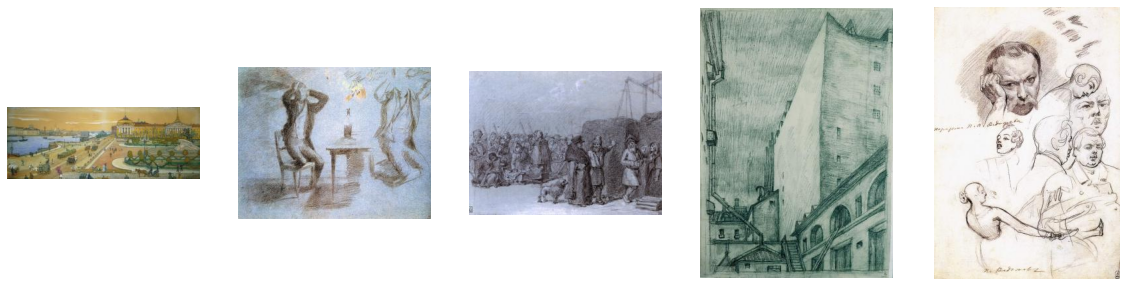

In [28]:
# Display the first few images
num_images_to_display = 5
fig, axes = plt.subplots(1, num_images_to_display, figsize=(20, 5))

for i in range(num_images_to_display):
    axes[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    axes[i].axis('off')

plt.show()


# Importing Libraries for Art Generation GAN ( Generative Adversarial Network )

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential


# Defining the Generator and Discriminator Models

In [19]:
def build_generator():
    model = Sequential([
        Dense(256, activation='relu', input_shape=(100,)),
        Dense(512, activation='relu'),
        Dense(1024, activation='relu'),
        Dense(784, activation='sigmoid'),
        Reshape((28, 28, 1))
    ])
    return model

def build_discriminator():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(1024, activation='relu'),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model


# Compile the Models

In [20]:
generator = build_generator()
discriminator = build_discriminator()

discriminator.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

discriminator.trainable = False

gan_input = tf.keras.layers.Input(shape=(100,))
x = generator(gan_input)
gan_output = discriminator(x)

gan = tf.keras.models.Model(gan_input, gan_output)

gan.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
            loss='binary_crossentropy')


# Define Training Functions

In [21]:
def train_gan(epochs, batch_size):
    # Load and preprocess your art dataset (you've already done this)
    # ...

    for epoch in range(epochs):
        for _ in range(0, num_samples, batch_size):
            # Sample random noise as generator input
            noise = np.random.normal(0, 1, (batch_size, 100))

            # Generate art using the generator
            generated_art = generator.predict(noise)

            # Train the discriminator on real and generated art
            real_labels = np.ones((batch_size, 1))
            fake_labels = np.zeros((batch_size, 1))

            d_loss_real = discriminator.train_on_batch(real_art_batch, real_labels)
            d_loss_fake = discriminator.train_on_batch(generated_art, fake_labels)

            # Train the GAN (generator)
            noise = np.random.normal(0, 1, (batch_size, 100))
            valid_labels = np.ones((batch_size, 1))

            g_loss = gan.train_on_batch(noise, valid_labels)

            # Print progress
            print(f"Epoch {epoch}/{epochs}, "
                  f"D Loss Real: {d_loss_real[0]}, D Loss Fake: {d_loss_fake[0]}, G Loss: {g_loss}")


# Creating List of image file paths

In [24]:
import os

# Directory containing your image files
dataset_dir = 'C:\\Users\\LENOVO\\Downloads\\art dataset\\dataset_updated\\training_set\\drawings'

# Get a list of all files in the directory
image_files = [os.path.join(dataset_dir, filename) for filename in os.listdir(dataset_dir)]

# Filter the list to only include image files (e.g., JPEGs)
image_files = [file for file in image_files if file.endswith('.jpg') or file.endswith('.jpeg')]

# Now, image_files contains a list of file paths to the images


# Train the GAN

In [25]:
def train_gan(epochs, batch_size):
    # Load and preprocess the art dataset
    # num_samples should be the total number of images in your dataset
    num_samples = len(image_files)  # Assuming image_files is your list of image file paths
    
    
    for epoch in range(epochs):
        for _ in range(0, num_samples, batch_size):
            # Sample random noise as generator input
            noise = np.random.normal(0, 1, (batch_size, 100))
            
            # Generate art using the generator
            generated_art = generator.predict(noise)


# Defining the generate_art function

In [31]:
def generate_art(user_input):
    #trained GAN model to generate art based on user input 
    generated_art = generator.predict(noise)
    return generated_art


# Displaying Images

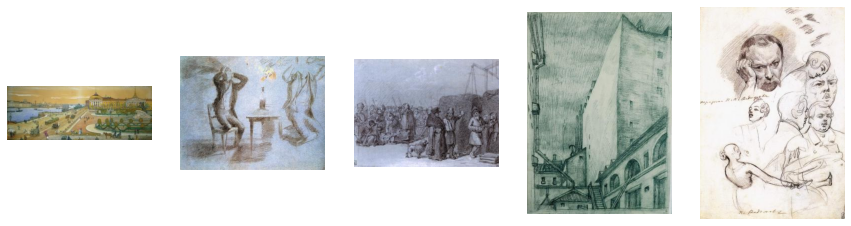

In [32]:
# Display a few images from dataset
num_images_to_display = 5
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5))

for i in range(num_images_to_display):
    axes[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    axes[i].axis('off')

plt.show()


# Generating and Displaying Art

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


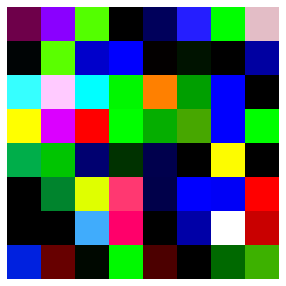

In [46]:
# Generate art with 512-dimensional noise input (matching the generator's input shape)
noise = np.random.normal(0, 1, (1, 512))  # Use 512 dimensions

# Generate art
generated_art = generate_art(noise)

# Display the generated art
plt.figure(figsize=(15, 5))
plt.imshow(cv2.cvtColor(generated_art[0], cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
